In [2]:
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#dataset
train_set='/content/drive/MyDrive/GurNum/trainset'
validate_set='/content/drive/MyDrive/GurNum/valset'

In [5]:
#For train_set we will assign all images with label
data_path=train_set

image_size=(28,28)

#Emplty list to store data
images=[]
lables=[]

#Loop for all the folders in train_set
for label in range(10):
    folder=os.path.join(data_path,'train',str(label))
    #print (folder)
    #Inside loop for images in all 10 folders
    for file in os.listdir(folder):
        files=os.path.join(folder,file)
        if files.endswith(('.tiff','.bmp')):
            #Resize images
            image=cv2.imread(files,cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image,image_size)
            #Applying labels
            images.append(image)
            lables.append(label)
#Convert images to arrays
images=np.array(images)
lables=np.array(lables)
#print(images)

#Save arrays
np.save('xtrain.npy',images)
np.save('ytrain.npy',lables)

In [6]:
val_data_path=validate_set

val_image_size=(28,28)

#Emplty list to store data
val_images=[]
val_lables=[]

#Loop for all the folders in train_set
for label in range(10):
    folder=os.path.join(val_data_path,'val',str(label))
    #print (folder)
    #Inside loop for images in all 10 folders
    for file in os.listdir(folder):
        files=os.path.join(folder,file)
        if files.endswith(('.tiff','.bmp')):
            #Resize images
            image=cv2.imread(files,cv2.IMREAD_GRAYSCALE)
            image=cv2.resize(image,image_size)
            #Applying labels
            val_images.append(image)
            val_lables.append(label)
#Convert images to arrays
images=np.array(val_images)
lables=np.array(val_lables)

#Save arrays
np.save('xtest.npy',val_images)
np.save('ytest.npy',val_lables)

In [7]:
#Loading dataset
xtrain= np.load('xtrain.npy')
ytrain= np.load('ytrain.npy')
xtest= np.load('xtest.npy')
ytest= np.load('ytest.npy')

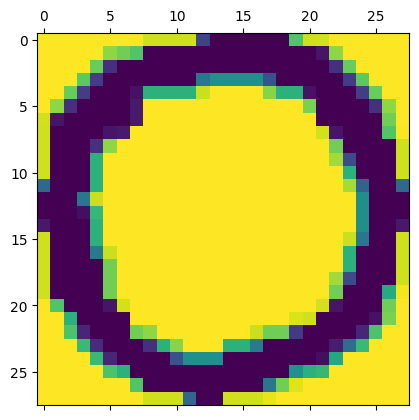

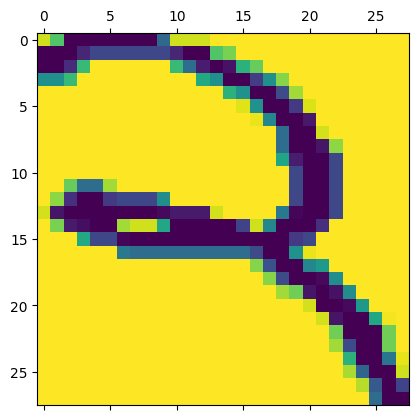

In [8]:
#view some images
plt.matshow(xtrain[5])
plt.matshow(xtest[45])

In [9]:
#Developing Neural Network Model
from keras.layers import Dense

xtrain_flattened = xtrain.reshape(len(xtrain), 28*28)
xtrain_scaled=xtrain_flattened/255
xtest_flattened = xtest.reshape(len(xtest), 28*28)
xtest_scaled=xtest_flattened/255

Neural_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

Neural_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x=Neural_model.fit(xtrain_scaled, ytrain, epochs=10,validation_data=(xtest_scaled,ytest))


Epoch 1/10
32/32 [==============================] - 1s 16ms/step - loss: 1.7101 - accuracy: 0.4530 - val_loss: 1.1835 - val_accuracy: 0.7472
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.8840 - val_loss: 0.7402 - val_accuracy: 0.8652
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4245 - accuracy: 0.9230 - val_loss: 0.5658 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.3134 - accuracy: 0.9400 - val_loss: 0.4837 - val_accuracy: 0.8820
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2530 - accuracy: 0.9560 - val_loss: 0.3993 - val_accuracy: 0.9157
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 0.9610 - val_loss: 0.3616 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1902 - accuracy: 0.9660 - val_loss: 0.3486 - val_accuracy: 0.9157
Epoch 8/10
32/32 [=

6/6 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.9326
Test accuracy: 0.932584285736084


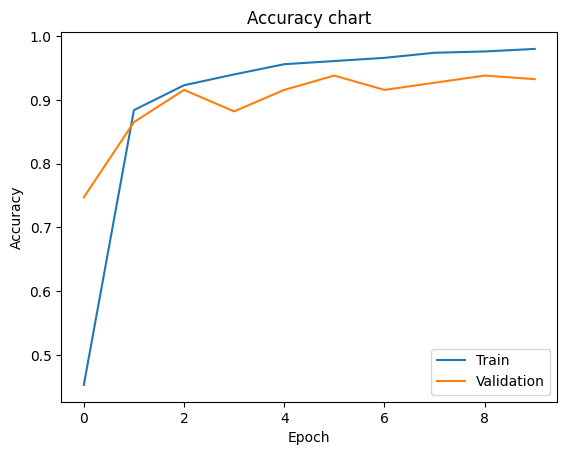

In [10]:
# Evaluate the model
test_loss, test_acc = Neural_model.evaluate(xtest_scaled, ytest)

print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(x.history['accuracy'])
plt.plot(x.history['val_accuracy'])
plt.title('Accuracy chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

6/6 [==============================] - 0s 3ms/step


array([0.10177704, 0.00801549, 0.15059774, 0.29522726, 0.44547486,
       0.99030954, 0.04472496, 0.5274365 , 0.5152549 , 0.2820276 ],
      dtype=float32)

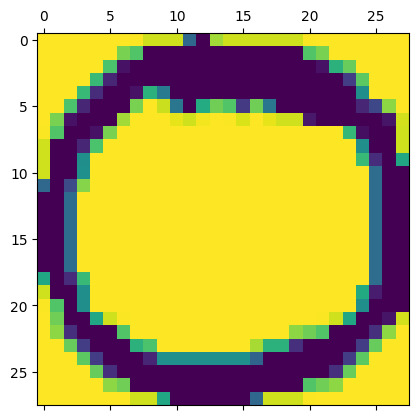

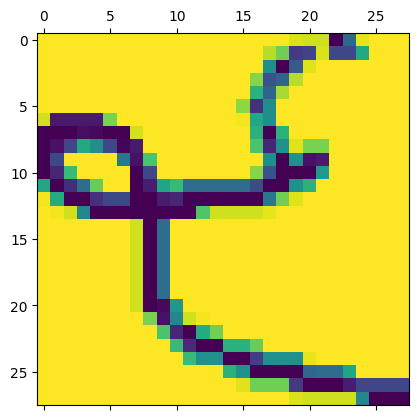

In [16]:
#Testing Model1
plt.matshow(xtest[5])
y_predicted=Neural_model.predict(xtest_scaled)
y_predicted[5]

#Testinf Model2
plt.matshow(xtest[175])
y_predicted=Neural_model.predict(xtest_scaled)
y_predicted[97]


Here 10 values of array are displayed as shown above . Out of which we need to extract max probability of array to predict handwritten value correctly

In [12]:
result1=np.argmax(y_predicted[5])
print('The image shows the handwritten digit:',result1)

result2=np.argmax(y_predicted[175])
print('The image shows the handwritten digit:',result2)

The image shows the handwritten digit: 0
The image shows the handwritten digit: 9


In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
confus_mat = tf.math.confusion_matrix(labels=ytest, predictions=y_predicted_labels)
confus_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0,  5, 12,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

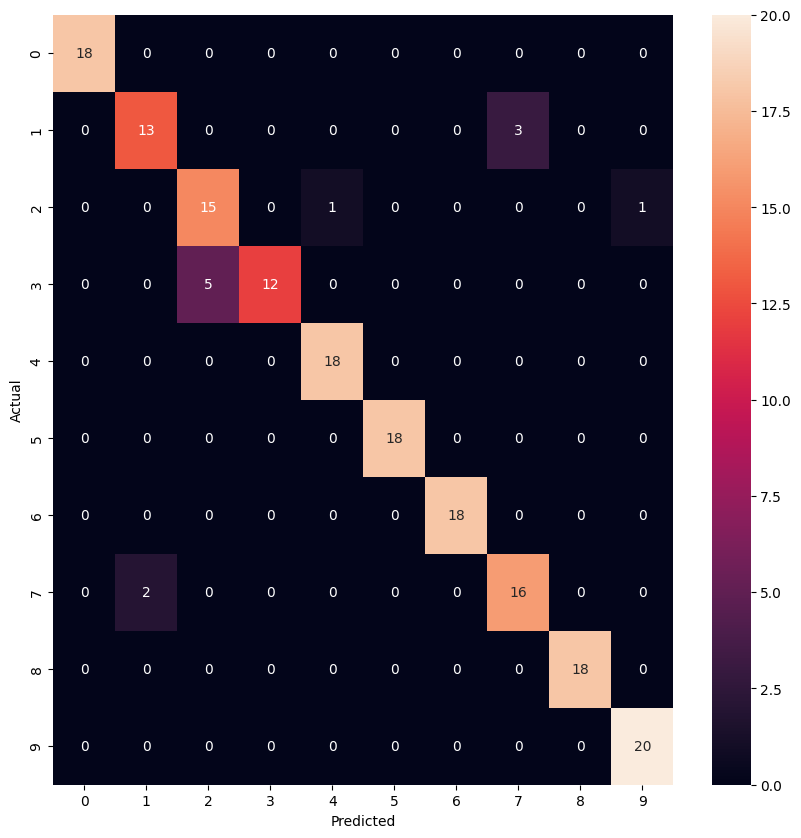

In [20]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(confus_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [22]:
Neural_model2 = keras.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(1024,input_shape=(784,), activation='relu'),#opted better activation function
keras.layers.Dense(15, activation='softmax') #added layers
])

Neural_model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)


y = Neural_model2.fit(xtrain_scaled, ytrain,epochs= 10, validation_data=(xtest_scaled, ytest))

Epoch 1/10
32/32 [==============================] - 2s 18ms/step - loss: 0.9073 - accuracy: 0.7190 - val_loss: 0.3584 - val_accuracy: 0.8876
Epoch 2/10
32/32 [==============================] - 0s 16ms/step - loss: 0.1772 - accuracy: 0.9520 - val_loss: 0.2934 - val_accuracy: 0.9326
Epoch 3/10
32/32 [==============================] - 0s 15ms/step - loss: 0.1387 - accuracy: 0.9590 - val_loss: 0.2697 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 0s 13ms/step - loss: 0.1617 - accuracy: 0.9540 - val_loss: 0.2288 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0672 - accuracy: 0.9820 - val_loss: 0.2285 - val_accuracy: 0.9438
Epoch 6/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0504 - accuracy: 0.9840 - val_loss: 0.2124 - val_accuracy: 0.9438
Epoch 7/10
32/32 [==============================] - 1s 24ms/step - loss: 0.0238 - accuracy: 0.9990 - val_loss: 0.1941 - val_accuracy: 0.9438
Epoch 8/10
32

6/6 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.9270
Test accuracy: 0.9269663095474243


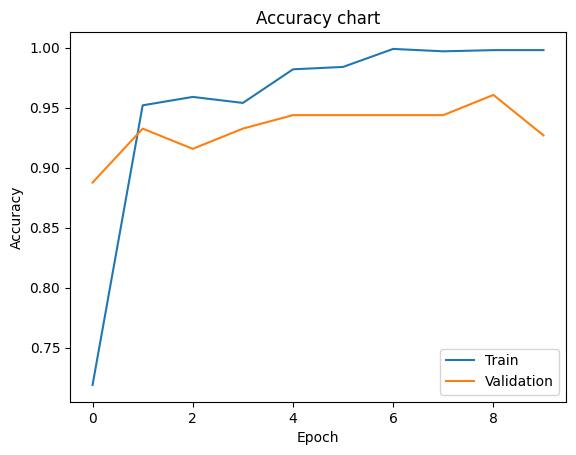

In [23]:
# Evaluate the model
test_loss, test_acc = Neural_model2.evaluate(xtest_scaled, ytest)

print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(y.history['accuracy'])
plt.plot(y.history['val_accuracy'])
plt.title('Accuracy chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Here adding layers have improved the performance of model. Also Relu activation function is more efficient than sigmoid


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


Text(95.72222222222221, 0.5, 'Actual')

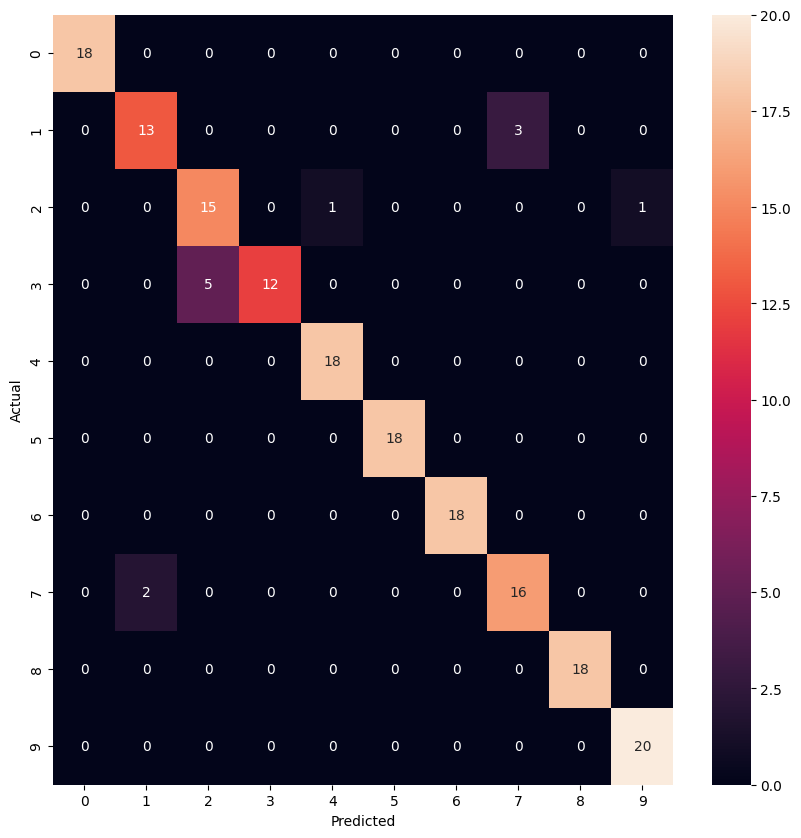

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
confus_mat = tf.math.confusion_matrix(labels=ytest, predictions=y_predicted_labels)
confus_mat


# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(confus_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
